In [1]:
#Loading all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from math import sqrt

In [2]:
#To load the dataset
df=pd.read_csv('googleplaystore1.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7,"5,000,000",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000",Free,0.0,Teen,Art & Design,"June 8, 2018",NaN,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000",Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000",Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000",Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000",Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000",Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3


In [3]:
#To load the data types
df.dtypes
#9 Categorical Columns
#4 Numerical Columns

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
#Coverts installs to numerical by ignoring the ','
df['Installs']=df.Installs.str.replace(',','').astype(float) #Convert size to float ignoring ,
#8 Categorical Columns
#5 Numerical Columns

In [5]:
#Data Cleaning for categorical data
#using the fillna function, with method ffill to fill missing values with previous row values
df[["App","Category","Type","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]]=df[["App","Category","Type","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]].fillna(method='ffill') #Categorical data,data cleaning

In [6]:
#Data Cleaning for numerical data
#using the fillna function,to fill missing values with the mean of the row
df['Rating']=df['Rating'].fillna(value=df['Rating'].mean())
df['Reviews']=df['Reviews'].fillna(value=df['Reviews'].mean())
df['Size']=df['Size'].fillna(value=df['Size'].mean())
df['Installs']=df['Installs'].fillna(value=df['Installs'].mean())
df['Price']=df['Price'].fillna(value=df['Price'].mean())

In [7]:
#To Check If data cleaning is done
df.iloc[10815]

App               FieldBi FR Offline
Category                    BUSINESS
Rating                       4.19176
Reviews                            2
Size                             6.8
Installs                         100
Type                            Free
Price                              0
Content Rating              Everyone
Genres                      Business
Last Updated          August 6, 2018
Current Ver                    2.1.8
Android Ver                      4.1
Name: 10815, dtype: object

In [8]:
#Reload to check if Data is cleaned
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.00000,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.00000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.700000,87510,8.70000,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.00000,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",1.2.4,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.80000,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.60000,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.00000,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.00000,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.00000,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.10000,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3


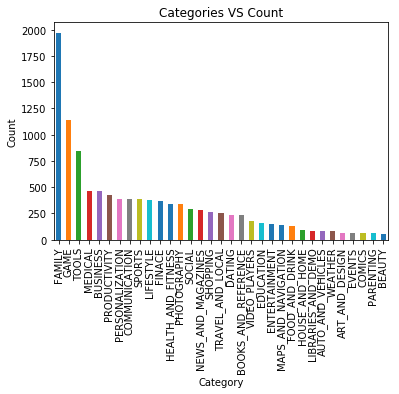

In [9]:
#Data Visualization
#Bar Graph of Category VS Count
df['Category'].value_counts().plot(kind="bar")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categories VS Count')
plt.show()

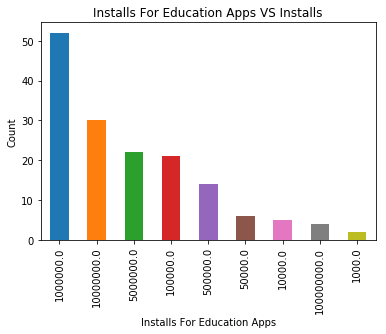

In [10]:
#df1 is the dataset extracted from df with only data that belongs to category :EDUCATION
#The Installs for education category is depicted in a bar graph 
df1=df[df["Category"] == "EDUCATION"] 
%matplotlib inline
df1['Installs'].value_counts().plot(kind="bar")
plt.xlabel('Installs For Education Apps')
plt.ylabel('Count')
plt.title('Installs For Education Apps VS Installs')
plt.show()

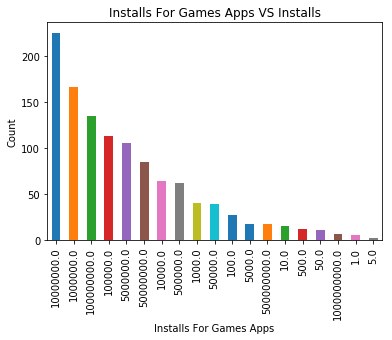

In [11]:
#df2 is the dataset extracted from df with only data that belongs to category :EDUCATION
#The Installs for education category is depicted in a bar graph 
df2=df[df["Category"] == "GAME"] 
%matplotlib inline
df2['Installs'].value_counts().plot(kind="bar")
plt.xlabel('Installs For Games Apps')
plt.ylabel('Count')
plt.title('Installs For Games Apps VS Installs')
plt.show()

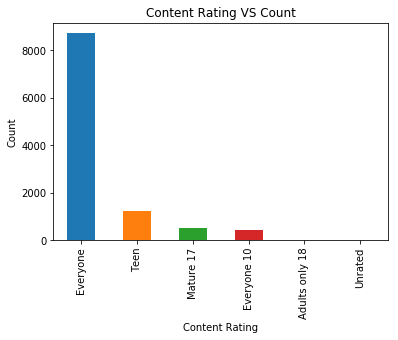

In [12]:
#Bar Graph of Content Rating and Cound
df['Content Rating'].value_counts().plot(kind="bar")
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Content Rating VS Count')
plt.show()

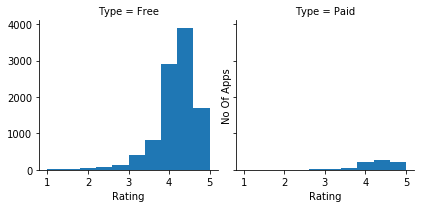

In [13]:
#using seaborn to get histograms to compare the no of apps free VS no of apps paid
grid = sns.FacetGrid(df, col='Type')
grid.map(plt.hist, 'Rating')
plt.ylabel("No Of Apps")
plt.show()

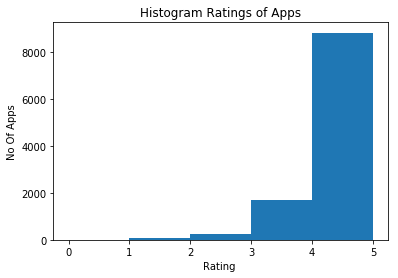

In [14]:
#Histogram for the ratings 1 to 5,it implies how many apps fall under each rating
n_bins = [0,1,2,3,4,5]
bin_heights, bins, patches = plt.hist(df["Rating"], n_bins)
plt.title("Histogram Ratings of Apps")
plt.xlabel("Rating ")
plt.ylabel("No Of Apps")
plt.show()

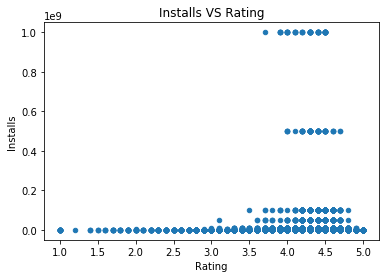

In [15]:
#Scatter Plot for Installs VS Rating
df.plot(kind='scatter',x='Rating',y='Installs')
plt.title('Installs VS Rating')
plt.show()

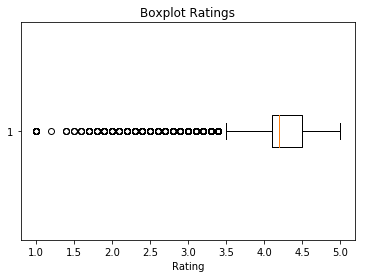

In [16]:
#boxplot of ratings
#to check for outliers
axes=plt.boxplot(df["Rating"],vert=False)
plt.title("Boxplot Ratings")
plt.xlabel("Rating")
plt.show()
#Outliers are present
#The Rating of most of the apps lies in between 3.5 to 5

In [17]:
#Hypothesis Test for Rating
#Finding all standard values
pop_mean=df["Rating"].mean() #Population mean
sample=df.sample(2500)  #Sampling
sample_mean=sample["Rating"].mean() #Sample mean
std_dev=sample["Rating"].std() #Sample Standard deviation
sample_size=2500 #Sample Size
alpha = 0.05


#Function of two sided hypothesis testing
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False


print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ = 4.191757420456902
H1 : μ != 4.191757420456902
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : 0.47372733556009805 

Failed to reject NULL hypothesis


In [18]:
#Co-relation
#To find correlation between all columns
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068018,-0.015803,0.051221,-0.020190
Reviews,0.068018,1.000000,0.017285,0.643122,-0.009667
Size,-0.015803,0.017285,1.000000,0.007361,0.014487
Installs,0.051221,0.643122,0.007361,1.000000,-0.011689
Price,-0.020190,-0.009667,0.014487,-0.011689,1.000000


In [19]:
#to get correlation between columns in descending order
df.corr().unstack().sort_values(ascending=False).drop_duplicates()

Price    Price       1.000000
Reviews  Installs    0.643122
Rating   Reviews     0.068018
         Installs    0.051221
Reviews  Size        0.017285
Size     Price       0.014487
         Installs    0.007361
Reviews  Price      -0.009667
Price    Installs   -0.011689
Rating   Size       -0.015803
         Price      -0.020190
dtype: float64

In [20]:
#Strongly Correlated
df['Reviews'].corr(df['Installs'])

0.6431220683230665

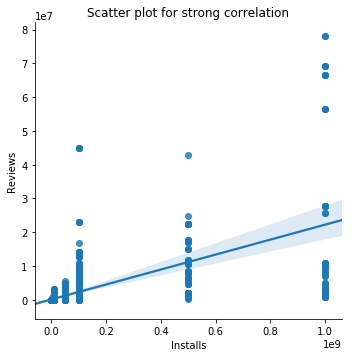

In [31]:
sns.lmplot(x='Installs',y='Reviews',data=df,fit_reg=True) 
#plt.scatter(df["Installs"],df["Reviews"])
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.title('Scatter plot for strong correlation')
plt.show()

In [22]:
#Weakly Correlated
df['Rating'].corr(df['Size'])

-0.015802820692903615

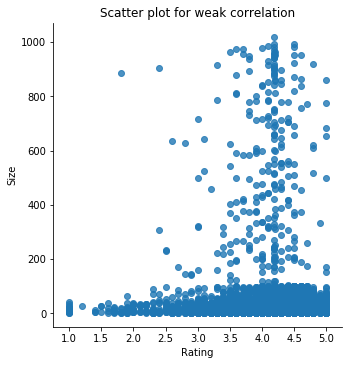

In [35]:
sns.lmplot(x='Rating',y='Size',data=df,fit_reg=False) 
#plt.scatter(df["Rating"],df["Size"])
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Scatter plot for weak correlation')
plt.show()